# Customer Churn Prediction Project

I was provided a dataset with customer characteristics, such as credit score, country, credit card ownership, etc. The dataset also included a binary feature indicating if a customer has churned. In this project, I will use the given dataset to accomplish the following tasks:

1. Identify factors contributing to the customer churn
2. Test various models to predict chances of a customer churning, so that the business can target such individuals

In [640]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Exploratory Data Analysis:

In [641]:
# Importing the dataset

data = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/DATA 0201 - Introduction to Python and Machine Learning/Projects/Predicting Customer Churn/Bank Customer Churn Prediction.csv')

In [642]:
# Understanding data shape, null, duplicate values
data.shape 
data.isnull().sum()


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [643]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [644]:
data.nunique()
data.drop(['customer_id'], axis = 1, inplace=True)

In [645]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Findings:

1. The data appears to be a snapshot at some point in time, i.e., the balance for a given date
2. The dataset contains 10,000 observations and 12 features
3. Our dataset does not contain any null values
4. Our dataset does not contain any duplicates - also shown by the 10,000 unique values for the customer ID. We will drop the customer ID feature because we do not want to profile customers in this task

In [646]:
# Here, I will try to understand what proportion of customer have churned. I will create a response variable
# I should also create predictor variables set and remove churn feature from our data, but I will hold onto it for now

response_variable = data['churn']
sizes = response_variable.value_counts()
total = response_variable.count()
labels = ['Not Churned', 'Churned']

sizes, total

(churn
 0    7963
 1    2037
 Name: count, dtype: int64,
 np.int64(10000))

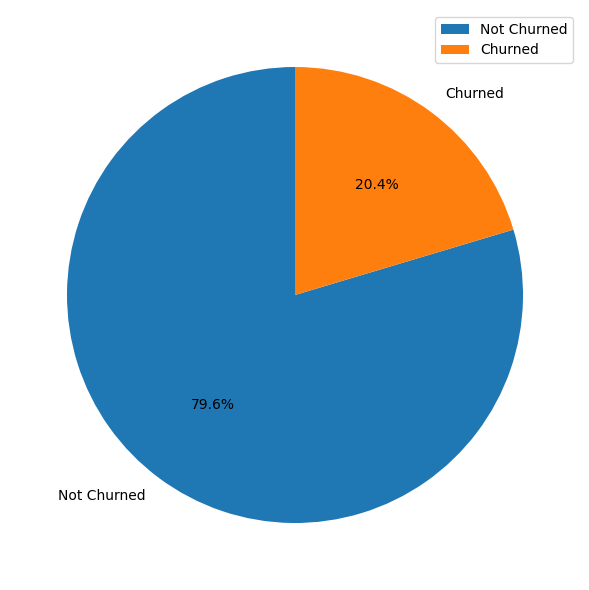

In [647]:
# Creating a pie-chart to understand the churn

plt.figure(figsize=(12,6))
plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
plt.legend()
plt.tight_layout()
plt.show()

### Additional Insights/Questions:

1. This dataset is highly imbalanced, with ~80% of observations identified as not churned. There is a high possibility that our ML model will achieve a high accuracy by predicting new customer to not churn. Hence, first, we must not rely on the accuracy score as a measure of model accuracy because we know it is flawed.
2. There are customers, such as N==1 who have churned, but still have balance in their accounts. Have they left the bank, or a product?
3. There are instances when customers have churned, but they are still classified as active members and vice versa (for e.g., N == 1, 4, 9996).
    * What does being an active member mean?
    * Have these customers left the bank, or a product?
4. For future, it would be helpful if there is information on the product level, so that the churn can be classified by the product. This provides insight into what product as failing, how the inventory should be updated, etc.

In [648]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: xlabel='credit_card', ylabel='count'>

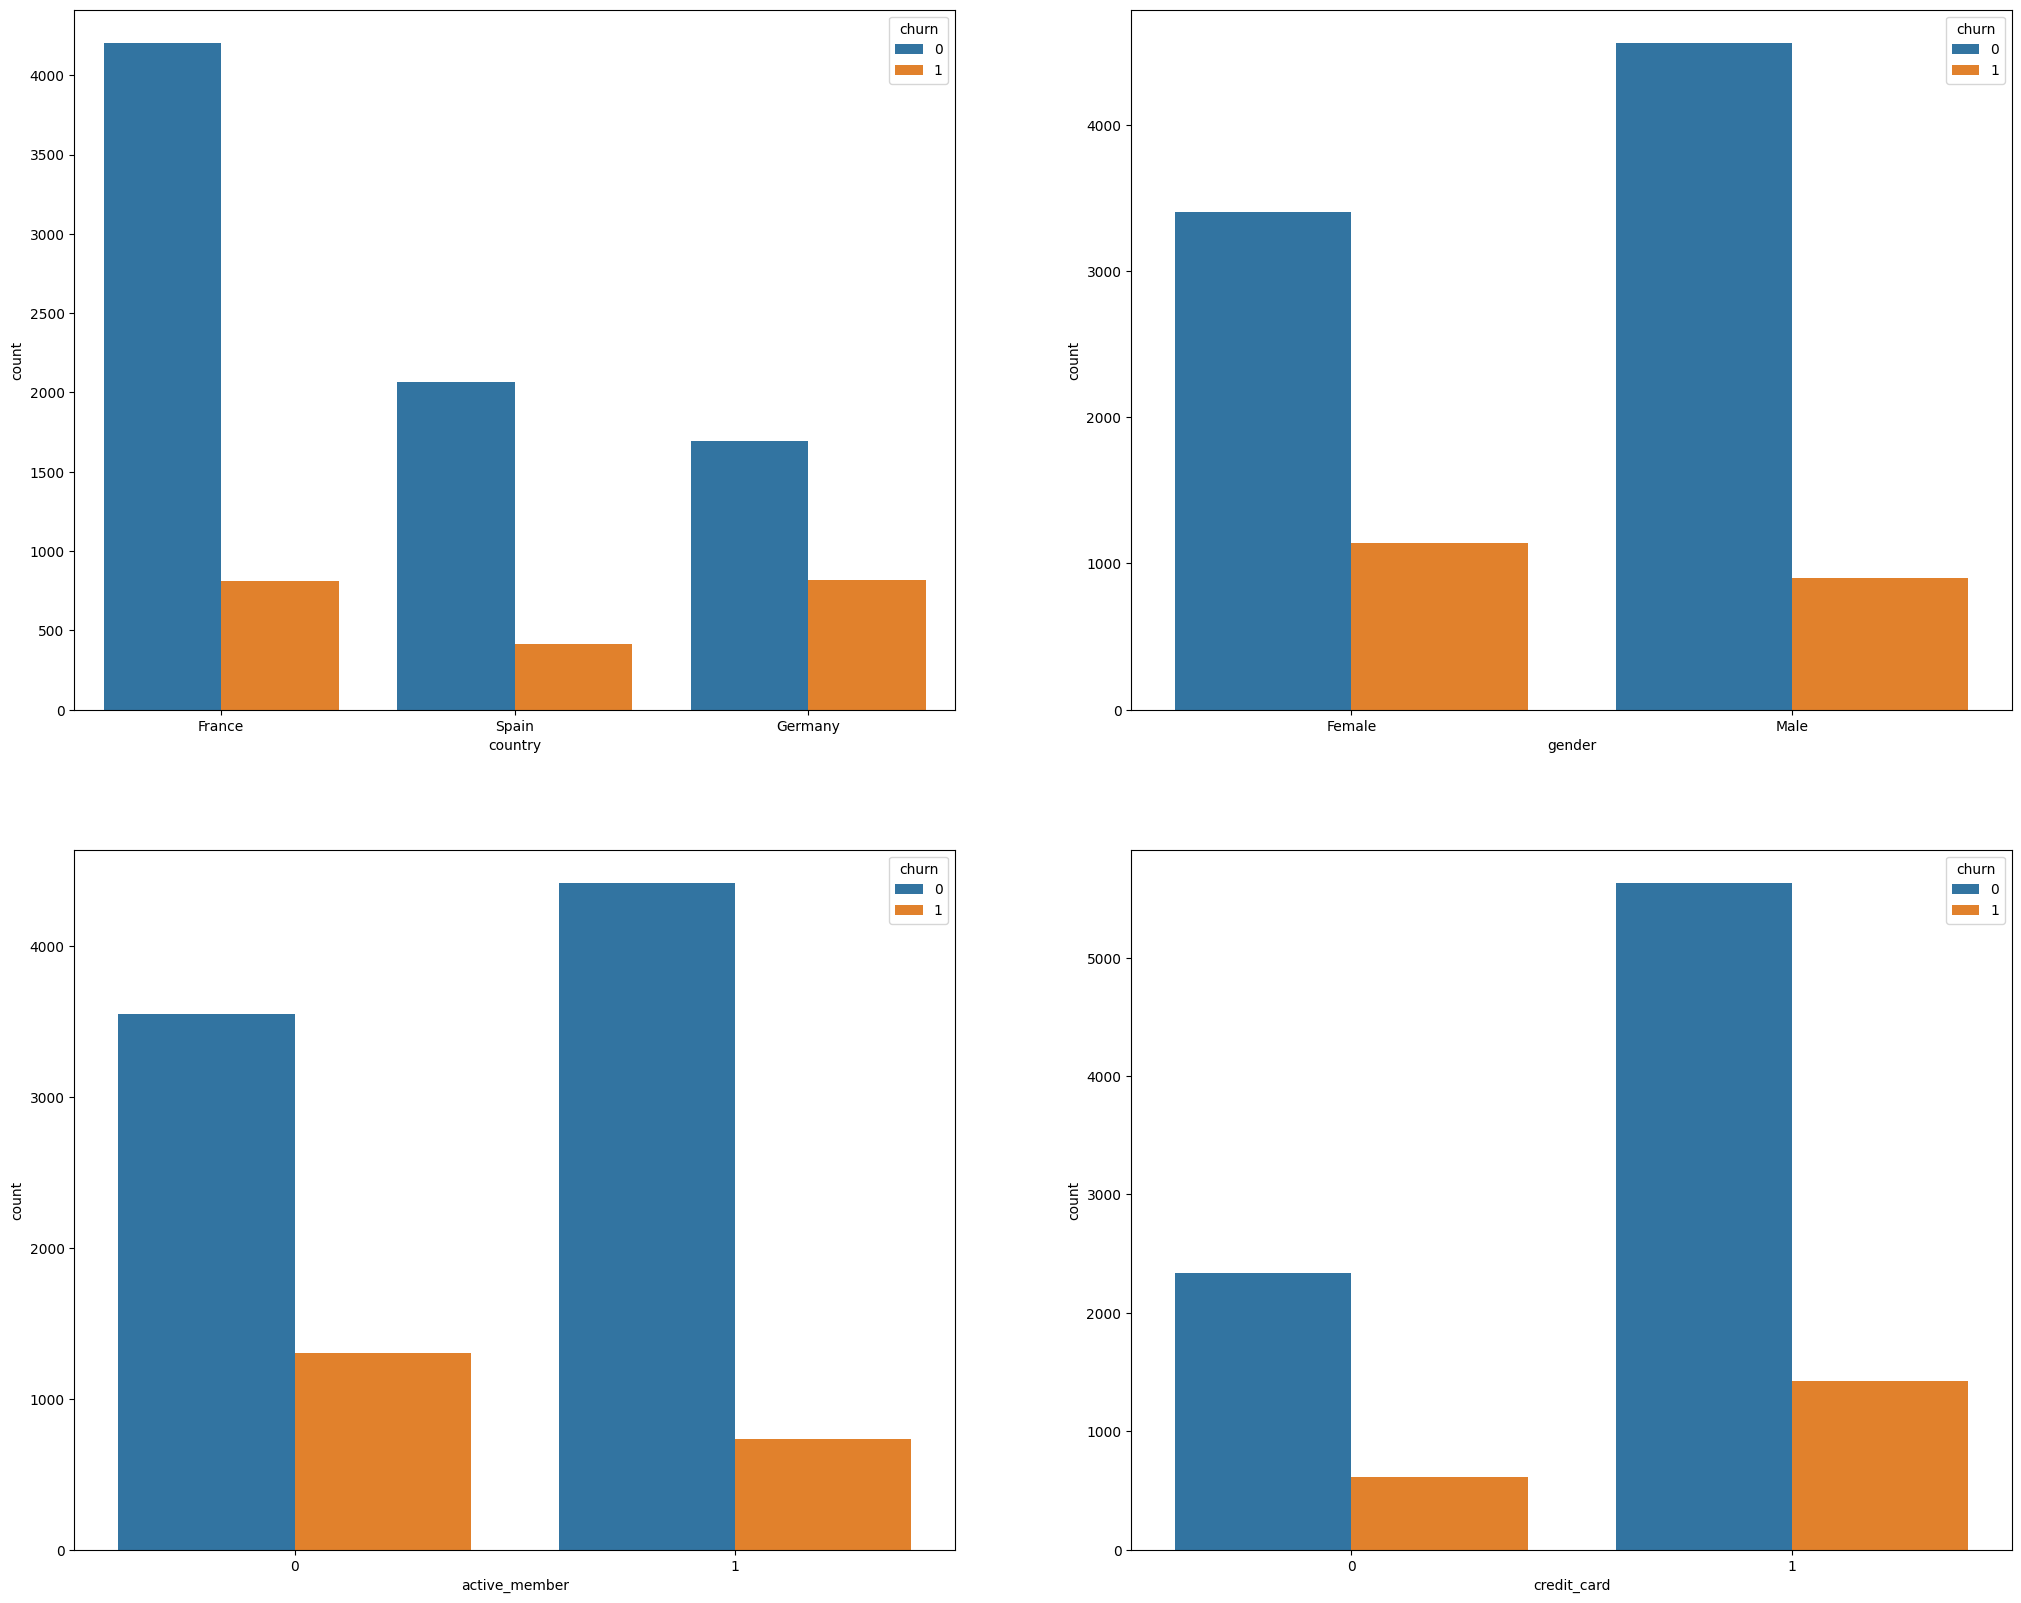

In [649]:
# Feature relationship based on categorical features/variable:
import seaborn as sns

fig, axarr = plt.subplots(2,2, figsize = (25,20))
sns.countplot(x ='country', hue='churn', data=data, ax=axarr[0][0])
sns.countplot(x = 'gender', hue ='churn', data=data, ax=axarr[0][1])
sns.countplot(x = 'active_member', hue ='churn', data=data, ax=axarr[1][0])
sns.countplot(x = 'credit_card', hue ='churn', data=data, ax=axarr[1][1])

#### Countplot observations:

Based on the countplots above, we observe the following trends in the data:

1. A majority of our customer are located in France. However, customer churn is inversely proportional to the country customer count. for example, Germany has the highest churn count. This could mean that the business is not allocating resources in areas with fewer customers, perhaps?
2. Female customers churn more often than the male customers
3. Majority of the customers who churn have a credit card
4. Unsurprisingly, the inactive customers churn the most. There are many inactive members, marking the need for the bank to implement a program to turn these customer into active mode. This is one simple way of bringing down the customer churn

<Axes: xlabel='churn', ylabel='estimated_salary'>

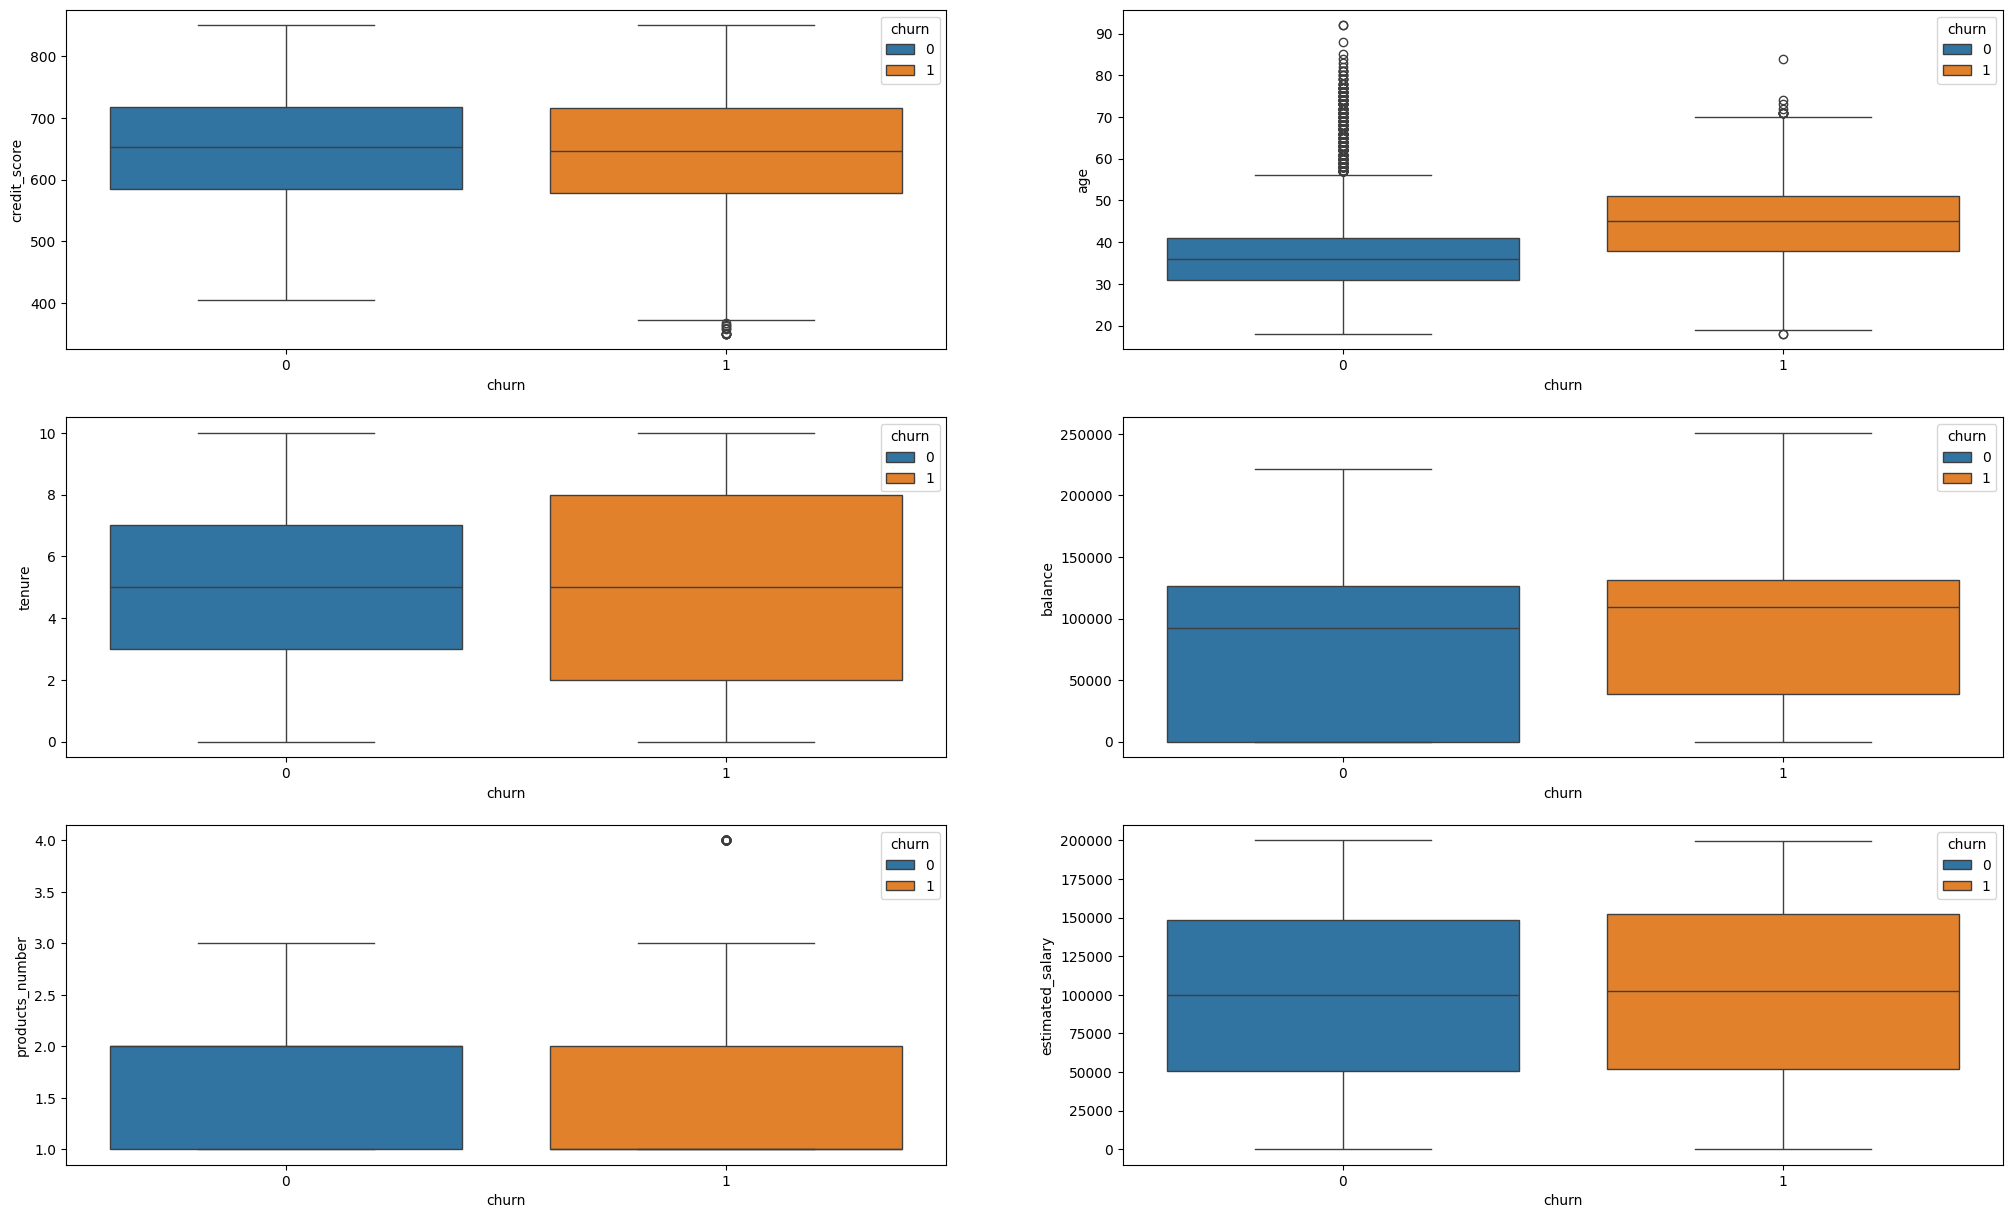

In [650]:
# Feature relationship based on continuous variables:

fig, axarr = plt.subplots(3,2, figsize = (25, 15))
sns.boxplot(y='credit_score', x='churn', hue ='churn', data=data, ax=axarr[0][0])
sns.boxplot(y='age', x='churn', hue ='churn', data=data, ax=axarr[0][1])
sns.boxplot(y='tenure', x='churn', hue='churn', data=data, ax=axarr[1][0])
sns.boxplot(y='balance', x='churn',hue='churn', data=data, ax=axarr[1][1])
sns.boxplot(y='products_number', x='churn', hue='churn', data=data, ax=axarr[2][0])
sns.boxplot(y='estimated_salary', x='churn', hue='churn', data=data, ax=axarr[2][1])

### Boxplot Observations:

1. Credit Score: there is no significant difference in credit score distribution for churned v non-churned customers.
2. Age: the older customers seem to be churning more than the younger customers. The bank may need to revise their target market, or strategies for older customer retention
3. Tenure: customer on either extremes (those who have been with the bank longest and shortest) churn more than those with average tenure.
4. Balance: customers with a higher account balance churn more - this is important because it negatively impacts the capital available for lending at the bank
5. Neither product, nor salary have a significant impact on the likelihood of churn


### Test and Train Split; Feature Engineering

Here, we will add features that are likely to have an impact on the probability of a customer churning

Hypothetically, 

* customer balance is a 'function' of salary, so we can introduce a variable standardizing balance over salary
* tenure is a function of age, so we can standardize this, too
* credit score is a function of spending behavior, so we will track it over the customers age

In [651]:
from sklearn.model_selection import train_test_split

# Divide the data into predictive and response features

y = response_variable
x = data.drop(['churn'], axis =1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9254,686,France,Male,32,6,0.00,2,1,1,179093.26
1561,632,Germany,Male,42,4,119624.60,2,1,1,195978.86
1670,559,Spain,Male,24,3,114739.92,1,1,0,85891.02
6087,561,France,Female,27,9,135637.00,1,1,0,153080.40
6669,517,France,Male,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,8,69712.74,1,1,1,69381.05
5191,682,France,Female,58,1,0.00,1,1,1,706.50
5390,735,France,Female,38,1,0.00,3,0,0,92220.12
860,667,France,Male,43,8,190227.46,1,1,0,97508.04


(-1.0, 5.0)

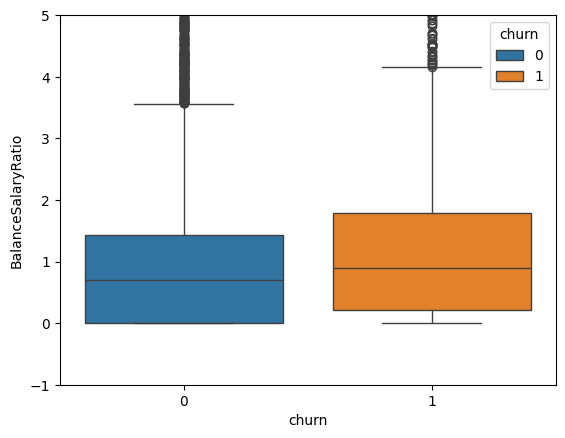

In [652]:
# We will add new features now:

x_train['BalanceSalaryRatio'] = x_train['balance']/x_train['estimated_salary']
sns.boxplot(y='BalanceSalaryRatio', x=response_variable, hue = response_variable, data=x_train)
plt.ylim(-1,5)

<Axes: xlabel='churn', ylabel='TenureByAge'>

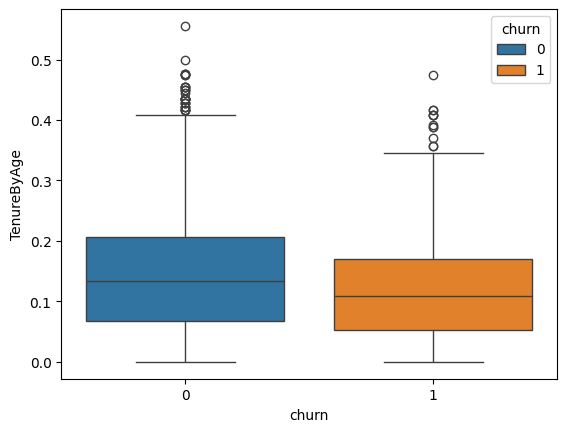

In [653]:
# Tenure by Age

x_train['TenureByAge'] = x_train['tenure']/x_train['age']
sns.boxplot(y='TenureByAge', x=response_variable, hue= response_variable, data=x_train)

<Axes: xlabel='churn', ylabel='CreditByAge'>

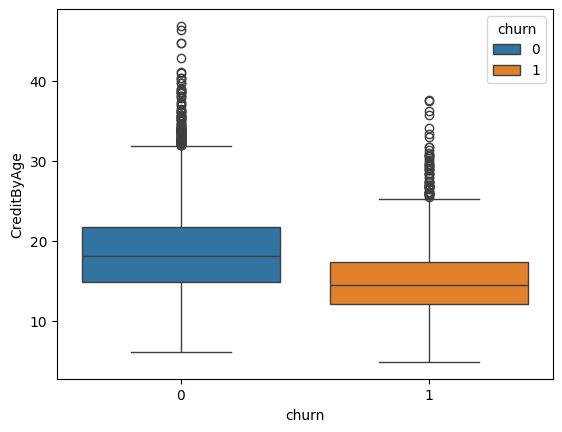

In [654]:
# Credit by Age

x_train['CreditByAge'] = x_train['credit_score']/x_train['age']
sns.boxplot(y='CreditByAge', x=response_variable, hue= response_variable, data=x_train)

### Observations from feature addition:

1. Balance to Salary Ratio: we observed above that while salary itself does not impact the probability of a customer churning, the balance/salary ratio does. Customers with higher balance/salary ratio churn more than those with a lower balance/salary ratio
2. The higher the TenureByAge and CreditByAge, the higher the likelihood of customer churn

### Preparing the data for analysis

##### Train Data


In [655]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation  where the attribute in inapplicable instead of 0'''

x_train.loc[x_train.credit_card == 0, 'credit_card'] = -1
x_train.loc[x_train.credit_card == 0, 'active_member'] = -1


x_train

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,BalanceSalaryRatio,TenureByAge,CreditByAge
9254,686,France,Male,32,6,0.00,2,1,1,179093.26,0.000000,0.187500,21.437500
1561,632,Germany,Male,42,4,119624.60,2,1,1,195978.86,0.610395,0.095238,15.047619
1670,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,1.335878,0.125000,23.291667
6087,561,France,Female,27,9,135637.00,1,1,0,153080.40,0.886051,0.333333,20.777778
6669,517,France,Male,56,9,142147.32,1,-1,0,39488.04,3.599756,0.160714,9.232143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,8,69712.74,1,1,1,69381.05,1.004781,0.148148,14.222222
5191,682,France,Female,58,1,0.00,1,1,1,706.50,0.000000,0.017241,11.758621
5390,735,France,Female,38,1,0.00,3,-1,0,92220.12,0.000000,0.026316,19.342105
860,667,France,Male,43,8,190227.46,1,1,0,97508.04,1.950890,0.186047,15.511628


In [656]:
# We will not encode the categorical variables, namely, Geography and Gender

lst =['country', 'gender']
remove = list()
for i in lst:
    if (x_train[i].dtype == str or x_train[i].dtype == object):
        for j in x_train[i].unique():
            x_train[i+ ' '+ j] = np.where(x_train[i] == j, 1, -1)
        remove.append(i)
x_train = x_train.drop(remove, axis=1)



##### Test Data:

In [657]:
# Performing the same feature engineering on the test data
x_test.loc[x_test.credit_card == 0, 'credit_card'] = -1
x_test.loc[x_test.active_member == 0, 'active_member'] = -1

lst =['country', 'gender']
remove = list()
for i in lst:
    if (x_test[i].dtype == str or x_test[i].dtype == object):
        for j in x_test[i].unique():
            x_test[i+ ' '+ j] = np.where(x_test[i] == j, 1, -1)
        remove.append(i)
x_test = x_test.drop(remove, axis=1)


In [658]:
# Balance-Salary Ratio
x_test['BalanceSalaryRatio'] = x_test['balance']/x_test['estimated_salary']

# Age-Tenure Ratio
x_test['TenureByAge'] = x_test['tenure']/x_test['age']

# Credit-Age Ratio
x_test['CreditByAge'] = x_test['credit_score']/x_test['age']

x_test

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country Germany,country France,country Spain,gender Male,gender Female,BalanceSalaryRatio,TenureByAge,CreditByAge
6252,596,32,3,96709.07,2,-1,-1,41788.37,1,-1,-1,1,-1,2.314258,0.093750,18.625000
4684,623,43,1,0.00,2,1,1,146379.30,-1,1,-1,1,-1,0.000000,0.023256,14.488372
1731,601,44,4,0.00,2,1,-1,58561.31,-1,-1,1,-1,1,0.000000,0.090909,13.659091
4742,506,59,8,119152.10,2,1,1,170679.74,1,-1,-1,1,-1,0.698103,0.135593,8.576271
4521,560,27,7,124995.98,1,1,1,114669.79,-1,-1,1,-1,1,1.090052,0.259259,20.740741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,602,53,5,98268.84,1,-1,1,45038.29,1,-1,-1,-1,1,2.181895,0.094340,11.358491
8285,609,25,10,0.00,1,-1,1,109895.16,-1,1,-1,1,-1,0.000000,0.400000,24.360000
7853,730,47,7,0.00,1,1,-1,33373.26,-1,1,-1,-1,1,0.000000,0.148936,15.531915
1095,692,29,4,0.00,1,1,-1,76755.99,-1,1,-1,1,-1,0.000000,0.137931,23.862069


### Scaling

We can observe that our features have varying numerical ranges. This will have model implications because features with higher numerical values posses the danger of dominating the models. Hence we need to scale the data. We will use MinMaxScaler


In [659]:
# Before scaling, ensure that features appear in the same order in test and train sets
ordered_cols = [
    'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'BalanceSalaryRatio', 'TenureByAge', 'CreditByAge', 'country France', 'country Germany', 'country Spain', 'gender Male', 'gender Female'
]
x_test = x_test[ordered_cols]
x_test

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,BalanceSalaryRatio,TenureByAge,CreditByAge,country France,country Germany,country Spain,gender Male,gender Female
6252,596,32,3,96709.07,2,-1,-1,41788.37,2.314258,0.093750,18.625000,-1,1,-1,1,-1
4684,623,43,1,0.00,2,1,1,146379.30,0.000000,0.023256,14.488372,1,-1,-1,1,-1
1731,601,44,4,0.00,2,1,-1,58561.31,0.000000,0.090909,13.659091,-1,-1,1,-1,1
4742,506,59,8,119152.10,2,1,1,170679.74,0.698103,0.135593,8.576271,-1,1,-1,1,-1
4521,560,27,7,124995.98,1,1,1,114669.79,1.090052,0.259259,20.740741,-1,-1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,602,53,5,98268.84,1,-1,1,45038.29,2.181895,0.094340,11.358491,-1,1,-1,-1,1
8285,609,25,10,0.00,1,-1,1,109895.16,0.000000,0.400000,24.360000,1,-1,-1,1,-1
7853,730,47,7,0.00,1,1,-1,33373.26,0.000000,0.148936,15.531915,1,-1,-1,-1,1
1095,692,29,4,0.00,1,1,-1,76755.99,0.000000,0.137931,23.862069,1,-1,-1,1,-1


In [660]:
x_train

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,BalanceSalaryRatio,TenureByAge,CreditByAge,country France,country Germany,country Spain,gender Male,gender Female
9254,686,32,6,0.00,2,1,1,179093.26,0.000000,0.187500,21.437500,1,-1,-1,1,-1
1561,632,42,4,119624.60,2,1,1,195978.86,0.610395,0.095238,15.047619,-1,1,-1,1,-1
1670,559,24,3,114739.92,1,1,0,85891.02,1.335878,0.125000,23.291667,-1,-1,1,1,-1
6087,561,27,9,135637.00,1,1,0,153080.40,0.886051,0.333333,20.777778,1,-1,-1,-1,1
6669,517,56,9,142147.32,1,-1,0,39488.04,3.599756,0.160714,9.232143,1,-1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,1.004781,0.148148,14.222222,1,-1,-1,1,-1
5191,682,58,1,0.00,1,1,1,706.50,0.000000,0.017241,11.758621,1,-1,-1,-1,1
5390,735,38,1,0.00,3,-1,0,92220.12,0.000000,0.026316,19.342105,1,-1,-1,-1,1
860,667,43,8,190227.46,1,1,0,97508.04,1.950890,0.186047,15.511628,1,-1,-1,1,-1


In [661]:
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Re-wrap in DataFrames to keep column names
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

In [662]:
x_test

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,BalanceSalaryRatio,TenureByAge,CreditByAge,country France,country Germany,country Spain,gender Male,gender Female
6252,0.492,0.189189,0.3,0.385452,0.333333,0.0,-1.0,0.208616,0.001745,0.168750,0.327559,0.0,1.0,0.0,1.0,0.0
4684,0.546,0.337838,0.1,0.000000,0.333333,1.0,1.0,0.731883,0.000000,0.041860,0.229142,1.0,0.0,0.0,1.0,0.0
1731,0.502,0.351351,0.4,0.000000,0.333333,1.0,-1.0,0.292531,0.000000,0.163636,0.209412,0.0,0.0,1.0,0.0,1.0
4742,0.312,0.554054,0.8,0.474902,0.333333,1.0,1.0,0.853458,0.000526,0.244068,0.088484,0.0,1.0,0.0,1.0,0.0
4521,0.420,0.121622,0.7,0.498194,0.000000,1.0,1.0,0.573241,0.000822,0.466667,0.377895,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,0.504,0.472973,0.5,0.391668,0.000000,0.0,1.0,0.224875,0.001645,0.169811,0.154677,0.0,1.0,0.0,0.0,1.0
8285,0.518,0.094595,1.0,0.000000,0.000000,0.0,1.0,0.549353,0.000000,0.720000,0.464003,1.0,0.0,0.0,1.0,0.0
7853,0.760,0.391892,0.7,0.000000,0.000000,1.0,-1.0,0.166515,0.000000,0.268085,0.253969,1.0,0.0,0.0,0.0,1.0
1095,0.684,0.148649,0.4,0.000000,0.000000,1.0,-1.0,0.383558,0.000000,0.248276,0.452156,1.0,0.0,0.0,1.0,0.0


### Model Fitting and Selection

For the model fitting, I will try out:

* Logistic Regression
* Random Forest (will take a long time to run, so please do not run)

In [674]:
# Import supporting functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Fit Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Scoring Functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [713]:
# Function to give best model score and parameters
def best_model(model):
    print("Best Score:", model.best_score_)    
    print("Best Parameters:", model.best_params_)
    print("Best Estimator:", model.best_estimator_)
def get_auc_scores(y_actual, proba_scores):
    auc_score = roc_auc_score(y_actual, proba_scores)
    fpr_df, tpr_df, _ = roc_curve(y_actual, proba_scores)
    return (auc_score, fpr_df, tpr_df)

### Logistic Regression



In [670]:
param_grid = {'C':[0.01,0.01,1,10,100,1000], 'max_iter': [300,1000], 'penalty':['l2']}
poly = PolynomialFeatures(degree=2)

local_gridCV_LR = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid = param_grid,
    cv = 5,
    verbose =0,
    refit = True
)
local_gridCV_LR.fit(x_train, y_train)
best_model(local_gridCV_LR)





Best Score: 0.815625
Best Parameters: {'C': 100, 'max_iter': 300, 'penalty': 'l2'}
Best Estimator: LogisticRegression(C=100, max_iter=300)


In [690]:
# Fitting the Logistic Regression with best parameters

model_LR = LogisticRegression(C=100, max_iter=300, penalty='l2')
model_LR.fit(x_train, y_train)
y_test_predict_Logistic = model_LR.predict(x_test)


### Random Forest Classifier

In [671]:
# Random Forest Classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}

local_gridCV_RF = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = param_grid,
    cv = 5,
    verbose = 0,
)
local_gridCV_RF.fit(x_train, y_train)
best_model(local_gridCV_RF)


Best Score: 0.8637499999999999
Best Parameters: {'max_depth': 8, 'max_features': 9, 'min_samples_split': 5, 'n_estimators': 50}
Best Estimator: RandomForestClassifier(max_depth=8, max_features=9, min_samples_split=5,
                       n_estimators=50)


In [716]:
# Fitting the Random Forest with best parameters

model = RandomForestClassifier(max_depth=8, max_features=9, min_samples_split=5, n_estimators=50)
model.fit(x_train, y_train)
y_test_predict_RF = model.predict(x_test)

### A Note on Accuracy:

Since our data is extremely imbalanced, our model will have a higher accuracy score by just labelling every data point to be 0. Hence, we need to calculate Confusion Matrix and AUC to understand our results better.

### Confusion Matrix, Classification Report, and Accuracy Scores


In [717]:
# Correlation Matrix, Accuracy Score Calculations
# Logistic Regression

conf_mat_log = confusion_matrix(y_test, y_test_predict_Logistic)
acc_score_log = accuracy_score(y_test, y_test_predict_Logistic)
class_report_log = classification_report(y_test, y_test_predict_Logistic)

print('Confusion Matrix \n', conf_mat_log)
print('Accuracy Score \n', acc_score_log)
print('Classification Report \n', class_report_log)

Confusion Matrix 
 [[1371  236]
 [ 187  206]]
Accuracy Score 
 0.7885
Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      1607
           1       0.47      0.52      0.49       393

    accuracy                           0.79      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000



In [691]:
# Correlation Matrix, Accuracy Score Calculations
# Random Forests

conf_mat_RF = confusion_matrix(y_test, y_test_predict_RF)
acc_score_RF = accuracy_score(y_test, y_test_predict_RF)
class_report_RF = classification_report(y_test, y_test_predict_RF)

print('Confusion Matrix \n', conf_mat_RF)
print('Accuracy Score \n', acc_score_RF)
print('Classification Report \n', class_report_RF)

Confusion Matrix 
 [[1547   60]
 [ 209  184]]
Accuracy Score 
 0.8655
Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



### ROC Curve

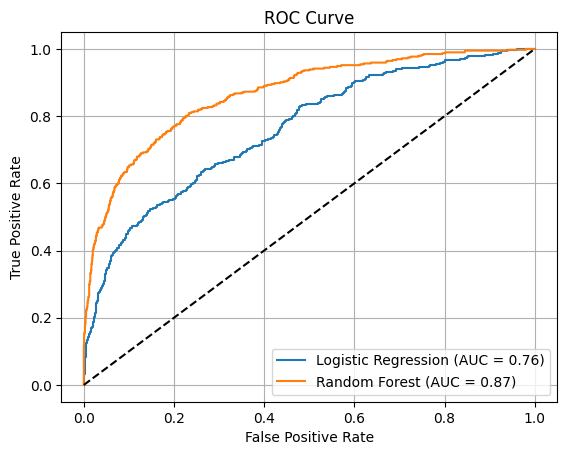

In [719]:
log_ROC = get_auc_scores(y_test, model_LR.predict_proba(x_test)[:, 1])
RF_ROC  = get_auc_scores(y_test, model.predict_proba(x_test)[:, 1])
log_auc, log_fpr, log_tpr = log_ROC
RF_auc, RF_fpr, RF_tpr = RF_ROC
# Plotting the ROC Curve


plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})')
plt.plot(RF_fpr, RF_tpr, label=f'Random Forest (AUC = {RF_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

### Comparison of Logistic Regression and Random Forests:

Form the results above, my goal is to predict the customer that will most likely churn so that the marketing team target those customers and develop plans to stop churn. Hence, recall is of more importance to me because the more True Positives my model can identify, the better the model. 

Given that in the data we only had ~20% of churn, a recall greater than this baseline is already an improvement. In this task, I will not pay much attention to False Positives since that means that the bank will target people who were not going to churn. This is good, in case they want to churn at some point.

For my purposes, Logistic Regression is a better model because it has a recall rate of 52%. While it does have a lower precision than the Random Forest model, that is due to the high number of False Positives generated in the Logistic Regression model.